# Decision Trees and Random Forest Trail 1
  ## Exploratory Data Analysis (EDW)
      1. Plotting the data
      
  ## Cleaning data 
      1. Dealing with a missing data by the following
           Filled in some missing values 
           Dropped some few missing values
      2. Dealing with categorical features by the following
           Creating a dummy variables
      
   ## Modeling 
      1. Split the data 
      2. Train the classification model --> it needs numeric features
      3. Confusion Matrix

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
train = pd.read_csv("C:\\AllamMarwa\\2- Courses\\Winter School in Spain\\Track1\\Day2\\titanic_train.csv")

# **EDW and Cleansing and Data Preparation**

**1. Dealing with the missing values**

In [6]:
def impute(train,Pclass):
    for i in train.Pclass.unique():
        if pd.isnull(train[train.Pclass==i]["Age"]).sum()!=0:
            train.Age.fillna(train[train.Pclass==i]["Age"].mean(),inplace=True)
            print (i)
    return train

In [7]:
train = impute(train, train.Pclass)

3


In [8]:
train.drop('Cabin',axis=1,inplace=True)

In [10]:
train.dropna(inplace = True)   #drop the null values in embarked columns

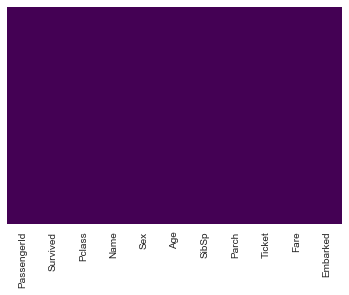

In [11]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap= 'viridis')

In [12]:
len(train)

889

**2. Dealing with categorical features **

In [13]:
Sex = pd.get_dummies(train[['Sex']], drop_first = True)

In [14]:
Embarked = pd.get_dummies(train[['Embarked']], drop_first = True)

In [15]:
train = pd.concat([train, Sex, Embarked],axis = 1)

In [16]:
train.drop(['Sex','Embarked','Name','Ticket'], axis = 1,inplace = True)

In [17]:
train.drop('PassengerId',axis = 1,inplace = True)

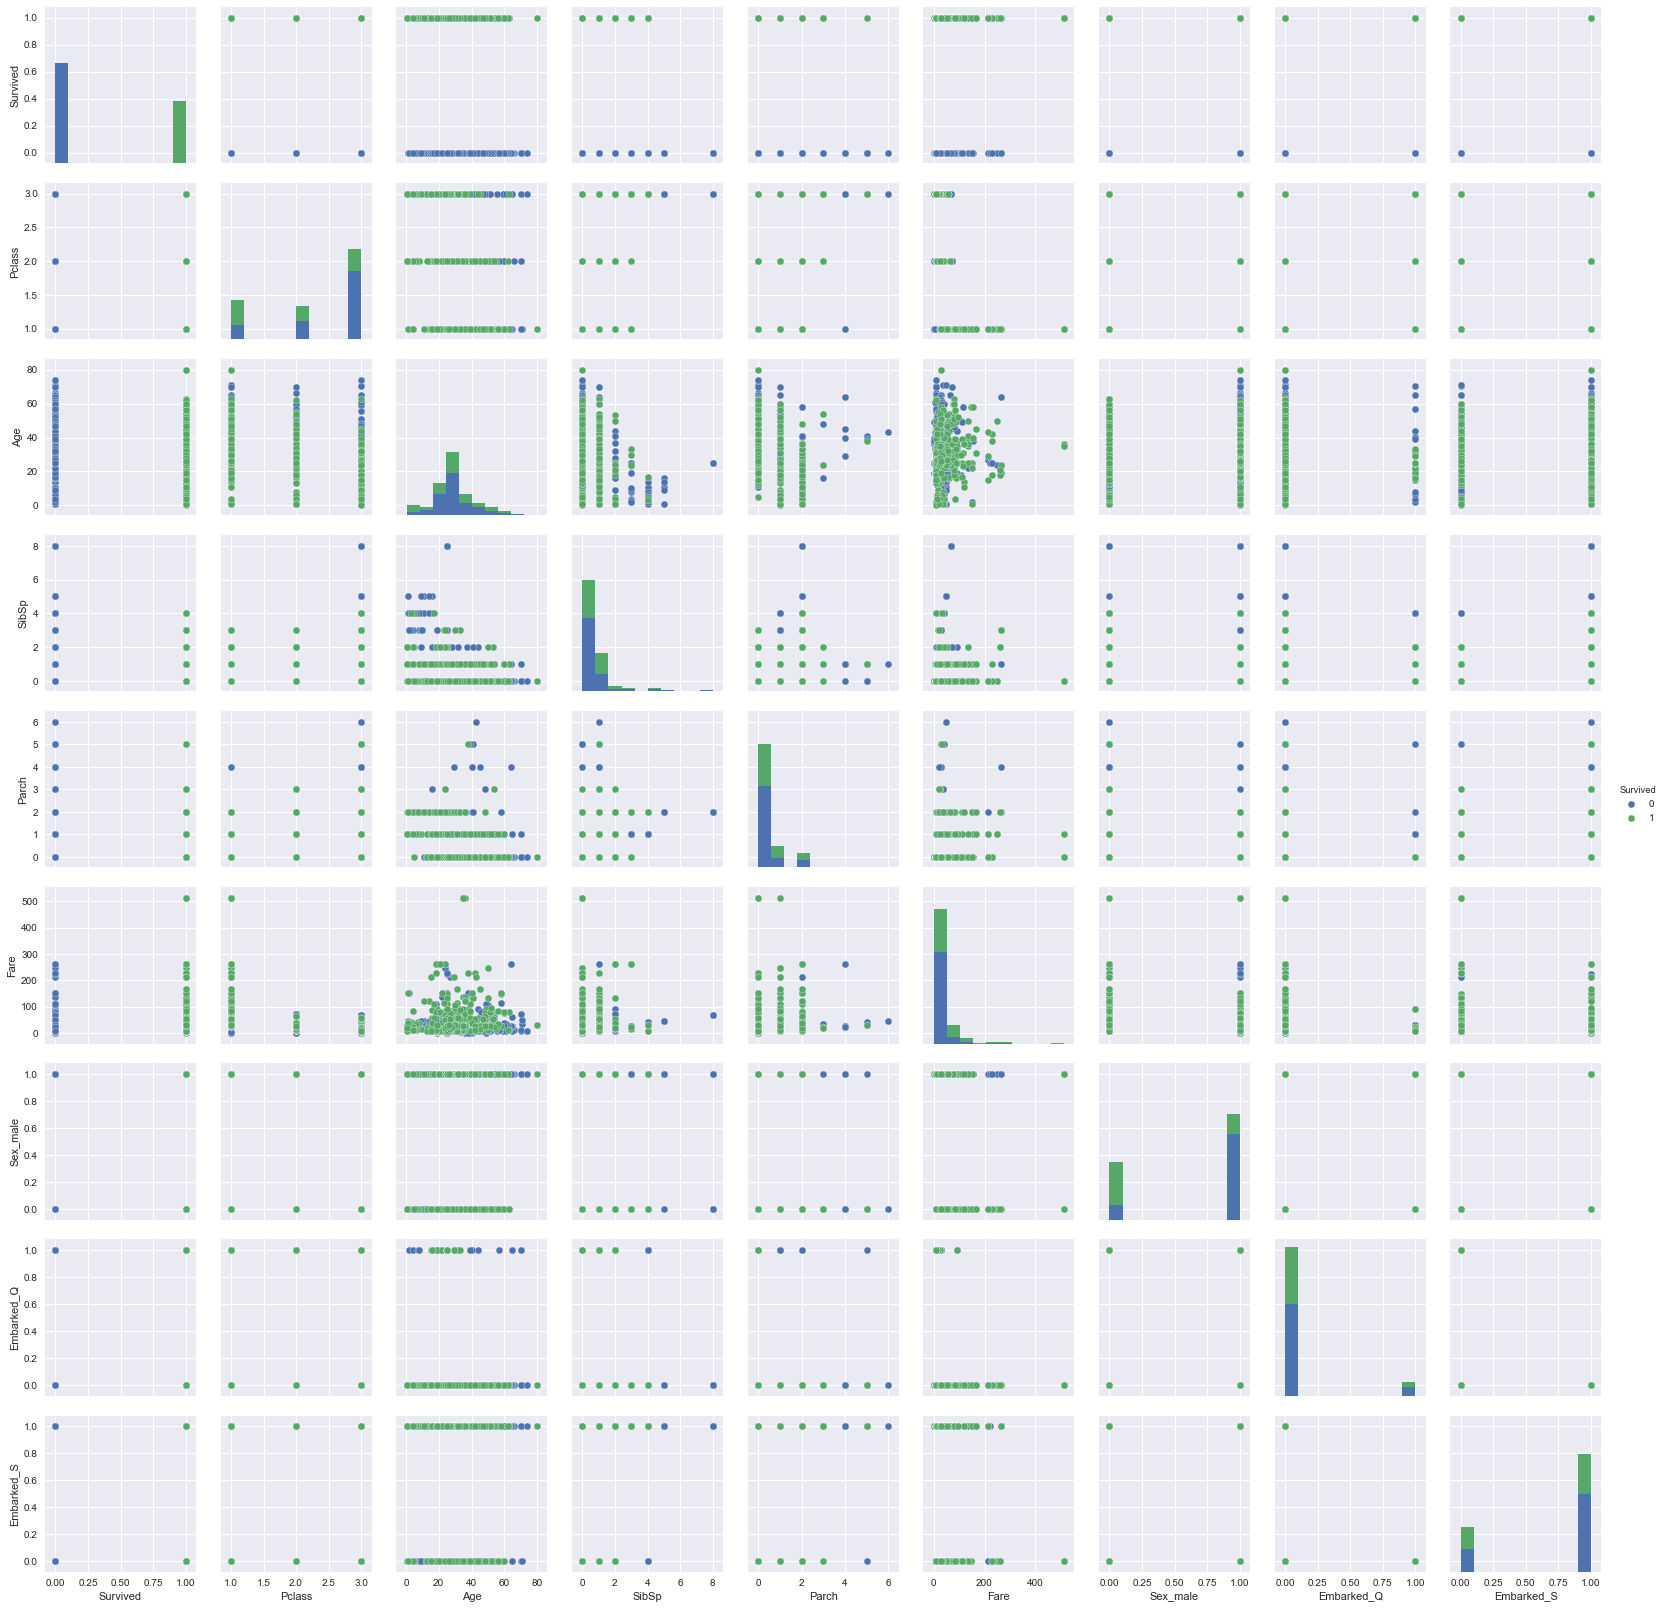

In [19]:
sns.pairplot(train, hue='Survived')

# **Building The Decision Trees Model**

In [22]:
from sklearn.cross_validation import train_test_split

In [24]:
X = train.drop('Survived', axis= 1)

In [25]:
y = train['Survived']

**1. Split the data into training and testing 70-30**

In [26]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=101)

In [28]:
from sklearn.tree import DecisionTreeClassifier

**2. Train the DT Classifier**

In [29]:
dtree = DecisionTreeClassifier()

In [30]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [31]:
predictions = dtree.predict(X_validation)

**3. Confusion Matrix**

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(confusion_matrix(y_validation, predictions))
print('\n')
print(classification_report(y_validation, predictions))

[[130  33]
 [ 34  70]]


             precision    recall  f1-score   support

          0       0.79      0.80      0.80       163
          1       0.68      0.67      0.68       104

avg / total       0.75      0.75      0.75       267



# **Building The Random Forest Model**

In [39]:
from sklearn.ensemble import RandomForestClassifier

**2. Train the model with same split ratio used in TD**

In [40]:
RanForst = RandomForestClassifier(n_estimators=200)

In [41]:
RanForst.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [43]:
RanFor_Predict = RanForst.predict(X_validation)

**3. Confusion Matrix**

In [47]:
print(confusion_matrix(y_validation,RanFor_Predict))
print('\n')
print(classification_report(y_validation,RanFor_Predict))

[[142  21]
 [ 27  77]]


             precision    recall  f1-score   support

          0       0.84      0.87      0.86       163
          1       0.79      0.74      0.76       104

avg / total       0.82      0.82      0.82       267

